In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/bm/readme/examples/LodeSTAR/06.track_plankton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

(-0.5, 149.5, 149.5, -0.5)

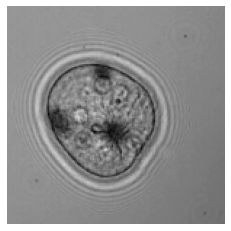

In [3]:
plankton_data = np.load("./data/plankton.npy")

downsample = 5

t, x, y, w = (0, 450, 320, 150) 
crop = plankton_data[t, y:y+w, x:x+w]
plt.imshow(crop, cmap="gray")
plt.axis("off")


Generating 161 / 160 samples before starting training
Epoch 1/10
161/161 [==============================] - 6s 8ms/step - total_loss: 2.6461 - consistency_loss: 1.1445
Epoch 2/10
161/161 [==============================] - 2s 13ms/step - total_loss: 2.3727 - consistency_loss: 1.0904
Epoch 3/10
161/161 [==============================] - 2s 13ms/step - total_loss: 1.8777 - consistency_loss: 0.7514
Epoch 4/10
161/161 [==============================] - 2s 13ms/step - total_loss: 1.3616 - consistency_loss: 0.6432
Epoch 5/10
161/161 [==============================] - 2s 14ms/step - total_loss: 0.4783 - consistency_loss: 0.1569
Epoch 6/10
161/161 [==============================] - 2s 13ms/step - total_loss: 0.2036 - consistency_loss: 0.0583 0s - total_loss: 0.2092 - consistency_loss
Epoch 7/10
161/161 [==============================] - 2s 10ms/step - total_loss: 0.1903 - consistency_loss: 0.0533 1s - tot
Epoch 8/10
161/161 [==============================] - 2s 13ms/step - total_loss: 0.1917 - 

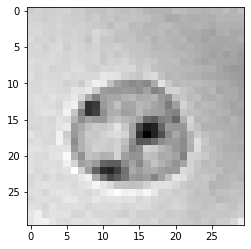

In [4]:

model = dt.models.LodeSTAR(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.AveragePooling(ksize=(downsample, downsample, 3))
    >> dt.Affine(rotate=lambda: np.random.rand()*np.pi*2, scale=lambda:np.random.uniform(0.95, 1.05, 2))
    >> dt.Add(lambda: np.random.randn() * 0.2)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.01))  
    >> dt.Multiply(lambda: np.random.uniform(0.3, 1.6))
)
train_set.plot(cmap="gray")
model.fit(
    train_set,
    epochs=10,
    batch_size=8,
)



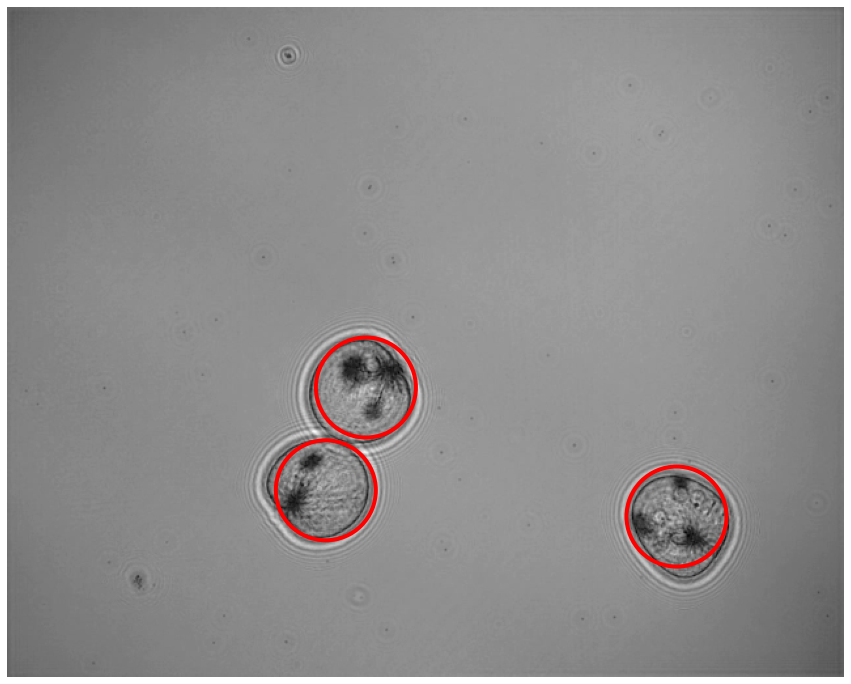

In [11]:
#May need to tune these to get optimal performance!
alpha = 1
cutoff = 0.05

frame_index = 1


detections = model.predict_and_detect(plankton_data[frame_index:frame_index+1, ::downsample, ::downsample, :1], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="constant")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(plankton_data[frame_index])
plt.axis("off")
plt.scatter(detections[:, 1] * downsample, detections[:, 0] * downsample, s=2000 * downsample, linewidths=4, facecolors="none", edgecolors="r")